<h1 align="center">Bank Credit Card Analysis</h1>

Objective: Analyze customers' transactions and credit profiles to figure out a target group for the launch of bank credit card

In [3]:
#Import Necessary Libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Data Reading 

In [4]:
df_cust = pd.read_csv("dataset/customers.csv")

In [5]:
df_cust.head(2)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single


In [6]:
df_cs = pd.read_csv("dataset/credit_profiles.csv")
df_trans = pd.read_csv("dataset/transactions.csv")

In [7]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


## Data Exploration and Cleaning

In [8]:
df_cust.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [9]:
df_cust[df_cust.annual_income.isna() == True]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,NaN,Married
170,171,Advait Verma,Male,52,City,Business Owner,NaN,Single
186,187,Samar Sardar,Male,53,City,Consultant,NaN,Single
192,193,Ishan Joshi,Male,37,Suburb,Data Scientist,NaN,Married
227,228,Advait Mukherjee,Male,48,City,Business Owner,NaN,Married
232,233,Aditya Goel,Male,26,City,Freelancer,NaN,Married


In [10]:
df_cust.annual_income.median()

np.float64(112218.5)

In [11]:
occupation_median = df_cust.groupby("occupation")["annual_income"].median()

In [12]:
occupation_median["Artist"]

np.float64(45794.0)

In [13]:
def get_median_val(row):
    if pd.isnull(row["annual_income"]):
        return occupation_median[row["occupation"]]
    else:
        return row["annual_income"]        

In [14]:
# Replace the Missing Values with the Occupational Mean

df_cust["annual_income"] = df_cust.apply(
    get_median_val,
    axis=1
)

In [15]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [16]:
df_cust.iloc[82]

cust_id                          83
name              Reyansh Mukherjee
gender                         Male
age                              27
location                       City
occupation               Freelancer
annual_income               46759.0
marital_status               Single
Name: 82, dtype: object

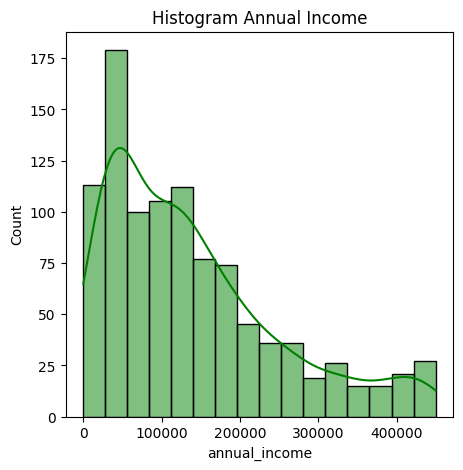

In [17]:
plt.figure(figsize=(5,5))
sns.histplot(df_cust["annual_income"],kde=True,color="green",label = 'Data')
plt.title("Histogram Annual Income")
plt.show()

In [18]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


### Cleaning the Outliers present in annual_income feature

In [19]:
df_cust[df_cust.annual_income < 100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


### Outlier Treatment: Annual income

Above records (with <100$ income) are outliers. We have following options to treat them,

1. **Remove them**: After discussion with business, we decided not to remove them as these are valid customers and we want to include them in our analysis
1. **Replace them with mean or median** : Mean is sensitive to outliers. It is better to use median for income values
1. **Replace them with occupation wise median**: Income level may vary based on occupation. For example median income for data scientist can be different from a median income of a business owner. It is better to use occupation wise median income for replacement


In [20]:
# Replacing the Outliers with Occupational Mean
for index,row in df_cust.iterrows():
    if row["annual_income"] < 100:
        df_cust.at[index,"annual_income"] = occupation_median[row["occupation"]]

In [21]:
df_cust.loc[[31,316]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,261191.5,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,58017.0,Married


### Data Visualization: Annual Income

We will explore average income level based on occupation, gender, location and marital status

In [22]:
occupation_mean = df_cust.groupby("occupation")["annual_income"].mean()

In [23]:
occupation_mean

occupation
Accountant              64123.562500
Artist                  45309.236842
Business Owner         268447.368512
Consultant              60703.154639
Data Scientist         137021.266304
Freelancer              76327.508772
Fullstack Developer     78727.972973
Name: annual_income, dtype: float64

In [24]:
occupation_mean.index

Index(['Accountant', 'Artist', 'Business Owner', 'Consultant',
       'Data Scientist', 'Freelancer', 'Fullstack Developer'],
      dtype='object', name='occupation')

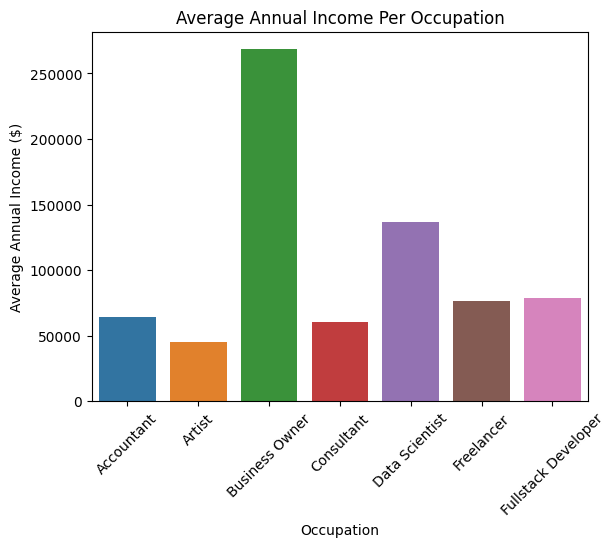

In [25]:
sns.barplot(x=occupation_mean.index,y=occupation_mean.values, palette="tab10")
plt.xticks(rotation=45)
plt.title('Average Annual Income Per Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Annual Income ($)')
plt.show()

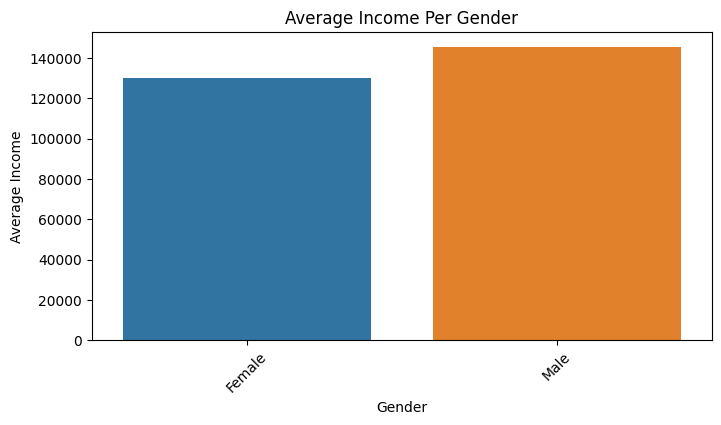

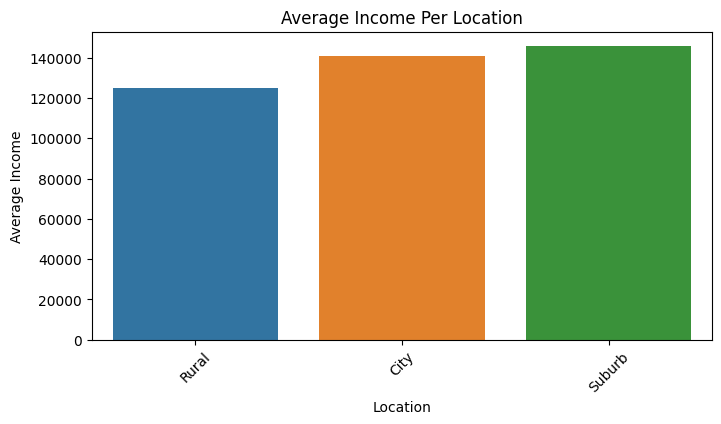

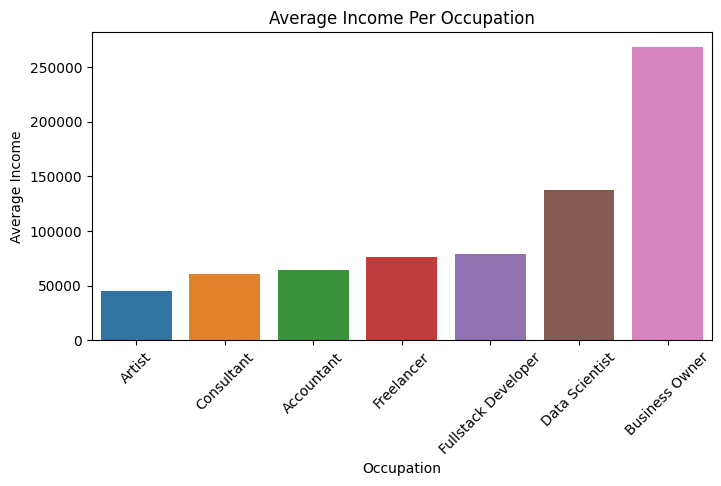

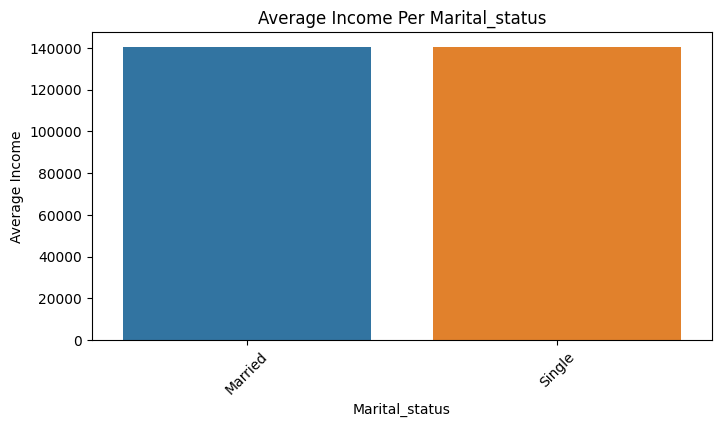

In [26]:
categorical_columns = ['gender','location','occupation','marital_status']

for col in categorical_columns:
    plt.figure(figsize=(8,4))
    avg_income_per_group = df_cust.groupby(col)['annual_income'].mean().sort_values()
    sns.barplot(x=avg_income_per_group.index,y=avg_income_per_group.values,palette="tab10")
    plt.title(f"Average Income Per {col.capitalize()}")
    plt.xticks(rotation=45)
    plt.xlabel(col.capitalize())
    plt.ylabel("Average Income")
    plt.show()

### Analysing Age Groups Column

In [27]:
df_cust["age"].median()

np.float64(32.0)

In [28]:
df_cust.age.describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

In [29]:
median_age = df_cust.groupby("occupation")["age"].median()

In [30]:
median_age["Artist"]

np.float64(26.0)

In [31]:
def get_rows_age(row):
    if row["age"] < 15 or row["age"] > 80:
        return median_age[row["occupation"]] 
    else:
        return row["age"]

In [32]:
df_cust["age"] = df_cust.apply(
    get_rows_age,
    axis=1
)

In [33]:
df_cust.age.describe()

count    1000.000000
mean       35.541500
std        12.276634
min        18.000000
25%        26.000000
50%        32.000000
75%        44.250000
max        64.000000
Name: age, dtype: float64

In [34]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married


### Data Visualization: Age Column

In [35]:
bins = [17,25,48,65]

labels = ['18-25','26-48','49-65']

df_cust["age_Group"] = pd.cut(df_cust["age"],bins = bins , labels=labels)

df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_Group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [38]:
age_group_counts = df_cust["age_Group"].value_counts(normalize=True)*100

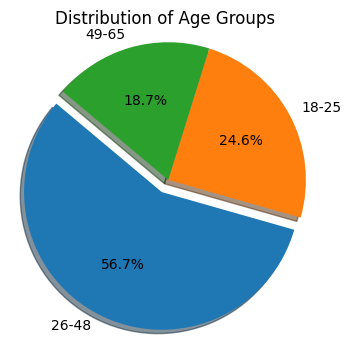

In [39]:
# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    age_group_counts, 
    labels=age_group_counts.index, 
    explode=(0.1,0,0), 
    autopct='%1.1f%%', 
    shadow=True,
    startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Age Groups')
plt.show()

# Majority of the sample population belongs to 26 years to 48 years Age

In [40]:
df_cust.location.value_counts()

location
City      683
Suburb    232
Rural      85
Name: count, dtype: int64

In [41]:
df_cust.gender.value_counts()

gender
Male      674
Female    326
Name: count, dtype: int64

In [42]:
location_gender = df_cust.groupby(["location","gender"]).size().unstack()

In [43]:
location_gender

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


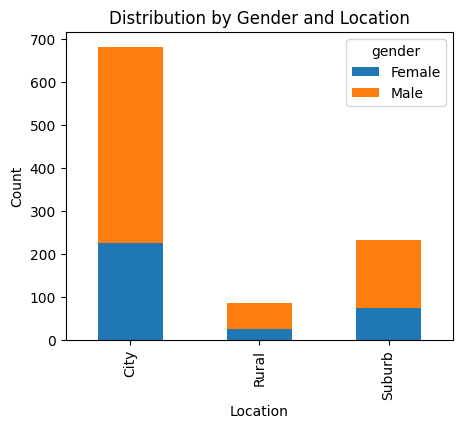

In [44]:
location_gender.plot(kind="bar",stacked = True ,figsize=(5,4))
plt.title("Distribution by Gender and Location")
plt.xlabel("Location")
plt.ylabel("Count")
plt.show()

### Credit Score Table Exploration

In [45]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [46]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_Group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [47]:
df_cs.cust_id.nunique()

1000

In [48]:
df_cs[df_cs.cust_id.duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [49]:
df_cs_clean = df_cs.drop_duplicates(subset="cust_id",keep="last")
# Deleting the duplicate Entries for column cust_id

In [50]:
df_cs_clean.shape

(1000, 6)

In [51]:
df_cs_clean.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [52]:
df_cs_clean.credit_score.mean()

np.float64(589.182)

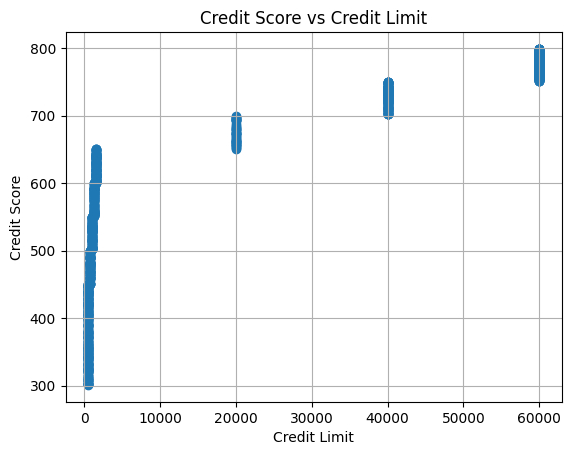

In [53]:
plt.scatter(df_cs_clean.credit_limit,df_cs_clean.credit_score)

plt.title("Credit Score vs Credit Limit")
plt.xlabel("Credit Limit")
plt.ylabel("Credit Score")
plt.grid(True)
plt.show()

In [54]:
# Creating a new Column Credit Score Range

bin_ranges = [300,450,500,550,600,650,700,750,800]

bin_labels = [f'{start}-{end-1}' for start,end in zip(bin_ranges,bin_ranges[1:])]

df_cs_clean["credit_score_range"]=pd.cut(df_cs_clean["credit_score"],bins=bin_ranges,labels = bin_labels)

In [55]:
df_cs_clean

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749
...,...,...,...,...,...,...,...
999,996,564,0.702963,688.0,2.0,1250.0,550-599
1000,997,774,0.465462,17139.0,0.0,60000.0,750-799
1001,998,529,0.585856,386.0,3.0,1000.0,500-549
1002,999,725,0.249670,6973.0,2.0,40000.0,700-749


In [56]:
mode_df = df_cs_clean.groupby("credit_score_range")["credit_limit"].agg(lambda x: x.mode().iloc[0]).reset_index()

In [57]:
df_cs_clean_2 = pd.merge(df_cs_clean,mode_df,on="credit_score_range",suffixes=("","_mode"))

In [58]:
df_cs_clean_2[df_cs_clean_2.credit_limit.isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
10,11,679,0.557450,9187.0,2.0,NaN,650-699,20000.0
35,36,790,0.112535,4261.0,1.0,NaN,750-799,60000.0
37,38,514,0.296971,238.0,2.0,NaN,500-549,1000.0
45,46,761,0.596041,24234.0,2.0,NaN,750-799,60000.0
64,65,734,0.473715,13631.0,0.0,NaN,700-749,40000.0
...,...,...,...,...,...,...,...,...
907,909,479,0.487555,320.0,3.0,NaN,450-499,750.0
926,928,311,0.832244,316.0,2.0,NaN,300-449,500.0
943,945,526,0.272734,227.0,1.0,NaN,500-549,1000.0
949,951,513,0.175914,131.0,3.0,NaN,500-549,1000.0


In [59]:
# Replacing the NA Values with Frequently Occuring Values for that particular range.
df_cs_clean_2["credit_limit"].fillna(df_cs_clean_2["credit_limit_mode"],inplace=True)

In [60]:
df_cs_clean_2.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,500.323323,589.471471,0.498663,9692.948949,1.955956,19752.752753,19752.752753
std,288.910029,152.085696,0.233079,25266.811373,1.414944,24722.506641,24722.506641
min,1.000000,301.000000,0.103761,33.000000,0.000000,500.000000,500.000000
25%,250.500000,460.000000,0.293785,221.000000,1.000000,750.000000,750.000000
50%,500.000000,602.000000,0.487290,551.000000,2.000000,1500.000000,1500.000000
75%,750.500000,738.000000,0.697670,11839.000000,3.000000,40000.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000,60000.000000


<Axes: >

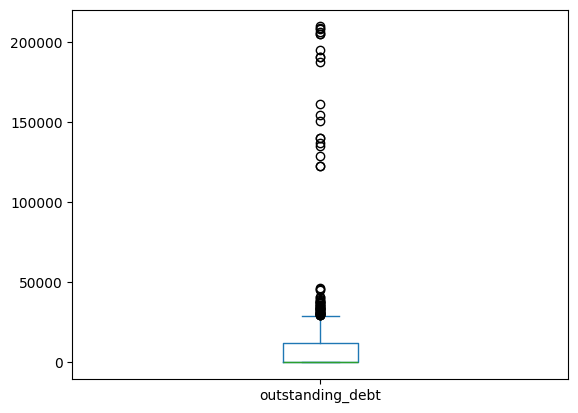

In [61]:
df_cs_clean_2["outstanding_debt"].plot(kind="box")

In [62]:
df_cs_clean_2[df_cs_clean_2["outstanding_debt"] > df_cs_clean_2["credit_limit"]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
19,20,647,0.439132,205014.0,3.0,1500.0,600-649,1500.0
25,26,758,0.250811,190838.0,2.0,60000.0,750-799,60000.0
38,39,734,0.573023,122758.0,3.0,40000.0,700-749,40000.0
93,94,737,0.739948,137058.0,2.0,40000.0,700-749,40000.0
204,205,303,0.364360,187849.0,0.0,500.0,300-449,500.0
271,272,703,0.446886,154568.0,1.0,40000.0,700-749,40000.0
301,302,722,0.608076,122402.0,4.0,40000.0,700-749,40000.0
330,331,799,0.363420,208898.0,4.0,60000.0,750-799,60000.0
350,351,320,0.285081,150860.0,0.0,500.0,300-449,500.0


In [63]:
df_cs_clean_2.loc[df_cs_clean_2["outstanding_debt"] > df_cs_clean_2["credit_limit"],'outstanding_debt'] = df_cs_clean_2["credit_limit"]

In [64]:
df_cs_clean_2.loc[[38]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
38,39,734,0.573023,40000.0,3.0,40000.0,700-749,40000.0


In [65]:
df_cs_clean_2

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0
...,...,...,...,...,...,...,...,...
994,996,564,0.702963,688.0,2.0,1250.0,550-599,1250.0
995,997,774,0.465462,17139.0,0.0,60000.0,750-799,60000.0
996,998,529,0.585856,386.0,3.0,1000.0,500-549,1000.0
997,999,725,0.249670,6973.0,2.0,40000.0,700-749,40000.0


### Data Exploration: Visualizing Correlation in Credit Score Table

In [66]:
df_cust

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_Group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48
...,...,...,...,...,...,...,...,...,...
995,996,Manya Vasudeva,Female,26.0,City,Freelancer,46759.0,Married,26-48
996,997,Aarav Dhawan,Male,55.0,City,Business Owner,290061.0,Single,49-65
997,998,Rehan Jha,Male,29.0,City,Fullstack Developer,139141.0,Married,26-48
998,999,Amara Rathore,Female,47.0,City,Business Owner,261191.5,Married,26-48


In [67]:
df_merged = df_cust.merge(df_cs_clean_2,on="cust_id",how="inner")
df_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_Group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [68]:
numerical_cols = ['credit_score','credit_utilisation','outstanding_debt','credit_limit','annual_income','age']

correlation_matrix = df_merged[numerical_cols].corr()
correlation_matrix

,credit_score,credit_utilisation,outstanding_debt,credit_limit,annual_income,age
credit_score,1.000000,-0.068281,0.680852,0.848261,0.575794,0.447698
credit_utilisation,-0.068281,1.000000,0.193771,-0.079631,-0.085740,-0.028897
outstanding_debt,0.680852,0.193771,1.000000,0.810502,0.555506,0.445148
credit_limit,0.848261,-0.079631,0.810502,1.000000,0.684653,0.512087
annual_income,0.575794,-0.085740,0.555506,0.684653,1.000000,0.619947
age,0.447698,-0.028897,0.445148,0.512087,0.619947,1.000000


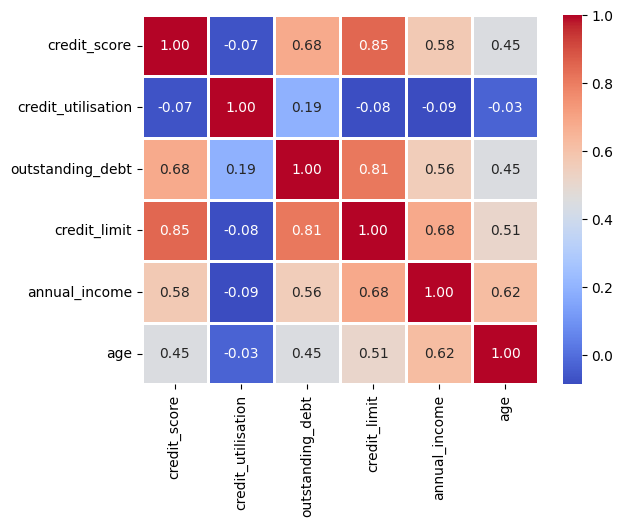

In [69]:
# Checking the Correlation between the features of the merged data frame

sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.8)

plt.show()

## Transaction Table Exploration

In [70]:
df_trans.shape

(500000, 7)

In [71]:
df_trans.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [72]:
df_trans[df_trans.platform.isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,NaN,Electronics,Net Banking
418,419,383,2023-01-01,338,NaN,Electronics,Credit Card
607,608,421,2023-01-01,700,NaN,Electronics,Phonepe
844,845,945,2023-01-01,493,NaN,Sports,Credit Card
912,913,384,2023-01-01,85,NaN,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,NaN,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,NaN,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,NaN,Sports,Net Banking
499833,499834,616,2023-09-05,97,NaN,Fashion & Apparel,Credit Card


In [73]:
df_trans['platform'].unique()

array(['Flipkart', 'Alibaba', 'Shopify', 'Amazon', 'Ebay', 'Meesho',
       'Cred', nan], dtype=object)

In [74]:
df_trans['platform'].mode()

0    Amazon
Name: platform, dtype: object

<Axes: xlabel='count', ylabel='product_category'>

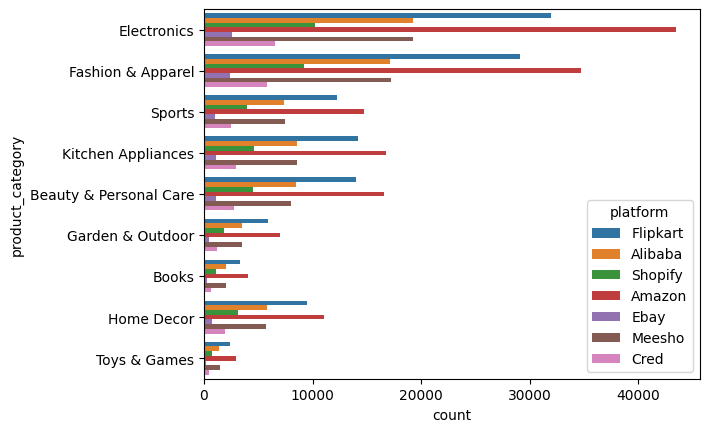

In [75]:
sns.countplot(y="product_category", hue="platform", data=df_trans)

In [76]:
df_trans['platform'].mode()[0]

'Amazon'

In [77]:
# Replacing the missing values for platform with mode
df_trans.platform.fillna(df_trans['platform'].mode()[0], inplace=True)

In [78]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [79]:
df_amount_zero = df_trans[df_trans.tran_amount==0]

In [80]:
df_amount_zero.shape

(4734, 7)

In [81]:
df_amount_zero.payment_type.value_counts()

payment_type
Credit Card    4734
Name: count, dtype: int64

In [82]:
df_amount_zero[["platform","payment_type","product_category"]].value_counts()

platform  payment_type  product_category
Amazon    Credit Card   Electronics         4734
Name: count, dtype: int64

In [83]:
df_trans_1 = df_trans[(df_trans.platform == "Amazon") & (df_trans.product_category=="Electronics") & (df_trans.payment_type == "Credit Card")]

In [84]:
df_trans_1

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499812,499813,688,2023-09-05,425,Amazon,Electronics,Credit Card
499860,499861,373,2023-09-05,480,Amazon,Electronics,Credit Card
499885,499886,520,2023-09-05,643,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,0,Amazon,Electronics,Credit Card


In [85]:
median_to_replace = df_trans_1[df_trans_1.tran_amount > 0].tran_amount.median()
median_to_replace

np.float64(554.0)

In [86]:
df_trans['tran_amount'].replace(0,median_to_replace,inplace=True)

In [87]:
df_trans[df_trans.tran_amount==0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


<Axes: xlabel='tran_amount', ylabel='Count'>

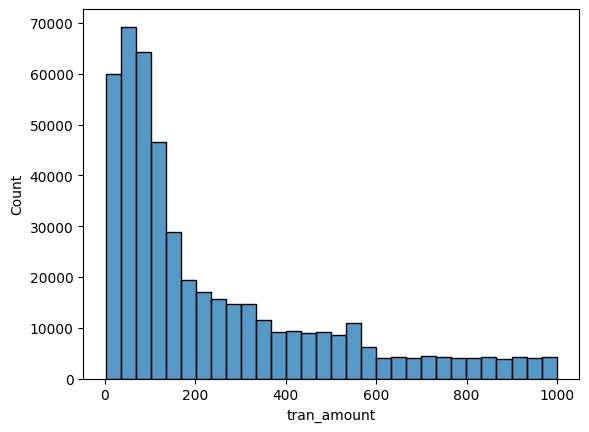

In [88]:
sns.histplot(df_trans[df_trans.tran_amount < 10000].tran_amount,bins=30)

In [89]:
Q1, Q3 = df_trans.tran_amount.quantile([0.25,0.75])
IQR = Q3 - Q1

lower = Q1 - 2*IQR
upper = Q3 + 2*IQR

lower,upper

(-628.0, 1107.0)

In [90]:
df_tran_outliers = df_trans[df_trans.tran_amount >= upper]

In [91]:
df_tran_outliers.shape

(25000, 7)

In [92]:
df_tran_normal = df_trans[df_trans.tran_amount < upper]

In [93]:
tran_mean_per_cat = df_tran_normal.groupby("product_category")["tran_amount"].mean()

In [94]:
df_trans.loc[df_tran_outliers.index, 'tran_amount'] = df_tran_outliers['product_category'].map(tran_mean_per_cat)

In [95]:
df_trans.loc[df_tran_outliers.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,176.773288,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,64.553463,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,176.773288,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,64.553463,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,64.553463,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,269.181631,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,269.181631,Meesho,Sports,Gpay


<Axes: xlabel='tran_amount', ylabel='Count'>

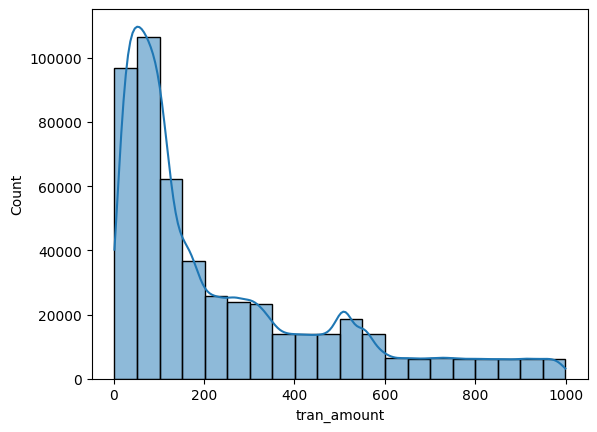

In [96]:
sns.histplot(df_trans.tran_amount, kde=True, bins =20)

In [97]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63.0,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99.0,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471.0,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33.0,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68.0,Amazon,Fashion & Apparel,Net Banking


<Axes: xlabel='payment_type', ylabel='percent'>

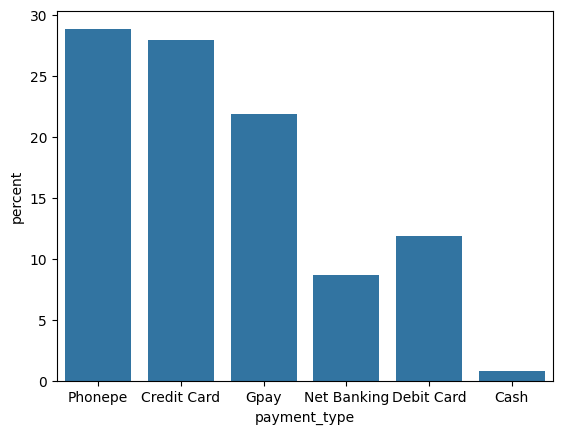

In [98]:
sns.countplot(x=df_trans.payment_type,stat='percent')

In [99]:
df_cust

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_Group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48
...,...,...,...,...,...,...,...,...,...
995,996,Manya Vasudeva,Female,26.0,City,Freelancer,46759.0,Married,26-48
996,997,Aarav Dhawan,Male,55.0,City,Business Owner,290061.0,Single,49-65
997,998,Rehan Jha,Male,29.0,City,Fullstack Developer,139141.0,Married,26-48
998,999,Amara Rathore,Female,47.0,City,Business Owner,261191.5,Married,26-48


In [100]:
df_merged_2 = pd.merge(df_merged,df_trans,on='cust_id',how="inner")
df_merged_2

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_Group,credit_score,...,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay
3,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1576,2023-01-01,149.0,Amazon,Beauty & Personal Care,Phonepe
4,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1757,2023-01-01,37.0,Flipkart,Fashion & Apparel,Credit Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499472,1000,Akshay Choudhary,Male,28.0,City,Freelancer,226873.0,Married,26-48,775,...,1.0,60000.0,750-799,60000.0,495592,2023-09-03,63.0,Shopify,Fashion & Apparel,Gpay
499473,1000,Akshay Choudhary,Male,28.0,City,Freelancer,226873.0,Married,26-48,775,...,1.0,60000.0,750-799,60000.0,495907,2023-09-03,743.0,Alibaba,Electronics,Phonepe
499474,1000,Akshay Choudhary,Male,28.0,City,Freelancer,226873.0,Married,26-48,775,...,1.0,60000.0,750-799,60000.0,496570,2023-09-04,20.0,Cred,Books,Credit Card
499475,1000,Akshay Choudhary,Male,28.0,City,Freelancer,226873.0,Married,26-48,775,...,1.0,60000.0,750-799,60000.0,497591,2023-09-04,558.0,Alibaba,Home Decor,Net Banking


<Axes: xlabel='age_Group', ylabel='count'>

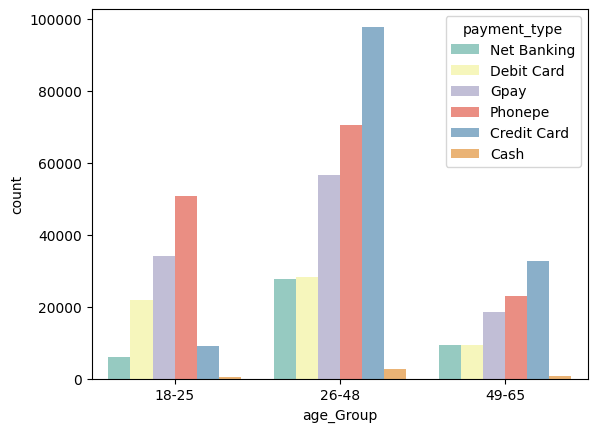

In [101]:
sns.countplot(x=df_merged_2["age_Group"], hue=df_merged_2["payment_type"], data=df_merged_2, palette='Set3')

<Axes: xlabel='age_Group', ylabel='count'>

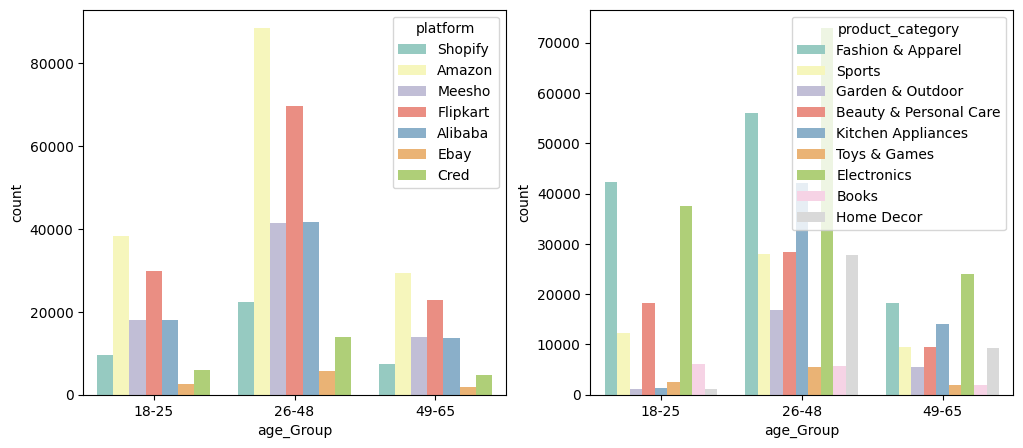

In [102]:
fig, (ax1,ax2) =plt.subplots(1,2, figsize=(12,5))

sns.countplot(x=df_merged_2["age_Group"], hue=df_merged_2["platform"], data=df_merged_2, palette='Set3',ax=ax1)
sns.countplot(x=df_merged_2["age_Group"], hue=df_merged_2["product_category"], data=df_merged_2, palette='Set3',ax=ax2)

### Observations:

1. Top 3 purchasing categories of customers in age group (18 -25) : Electronics, Fashion & Apparel, Beauty & personal care
1. Top platforms : Amazon, Flipkart, Alibaba

### Data Visualization: Average Transaction Amount

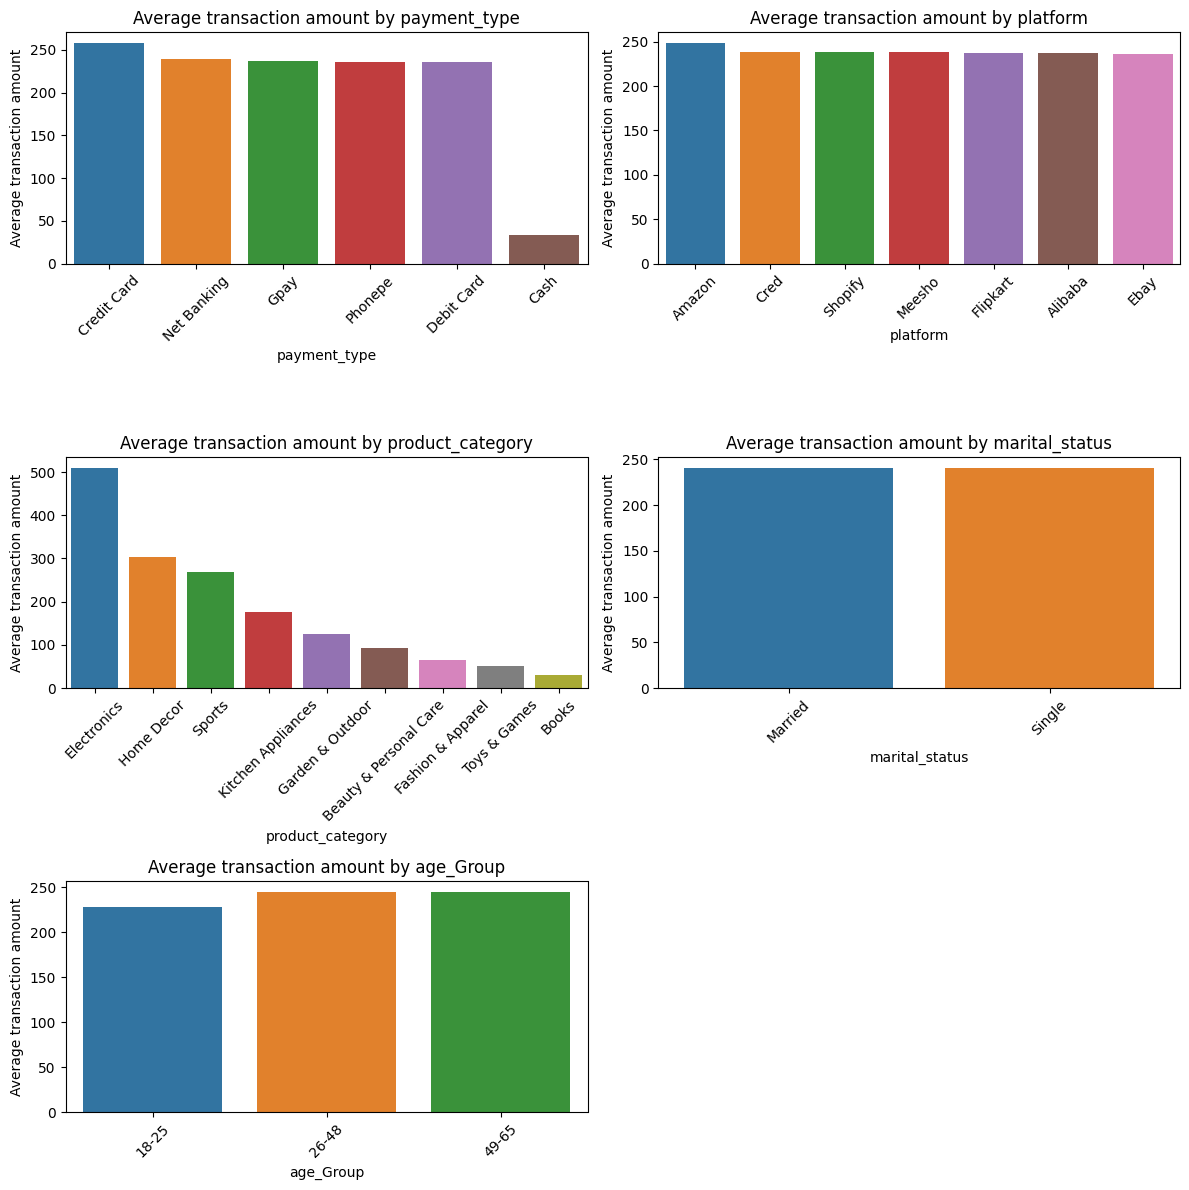

In [104]:
# List of categorical columns
cat_cols = ['payment_type', 'platform', 'product_category', 'marital_status', 'age_Group']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    # Calculate the average annual income for each category
    avg_tran_amount_by_category = df_merged_2.groupby(cat_col)['tran_amount'].mean().reset_index()
    
    # Sort the data by 'annual_income' before plotting
    sorted_data = avg_tran_amount_by_category.sort_values(by='tran_amount', ascending=False)
    
    sns.barplot(x=cat_col, y='tran_amount', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
    axes[i].set_title(f'Average transaction amount by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average transaction amount')

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

In [106]:
# Group the data by age group and calculate the average credit_limit and credit_score
age_group_metrics = df_merged.groupby('age_Group')[['annual_income', 'credit_limit', 'credit_score']].mean().reset_index()
age_group_metrics

,age_Group,annual_income,credit_limit,credit_score
0,18-25,37091.235772,1130.081301,484.451220
1,26-48,145991.274735,20595.848057,598.095406
2,49-65,260165.925134,41699.197861,701.524064


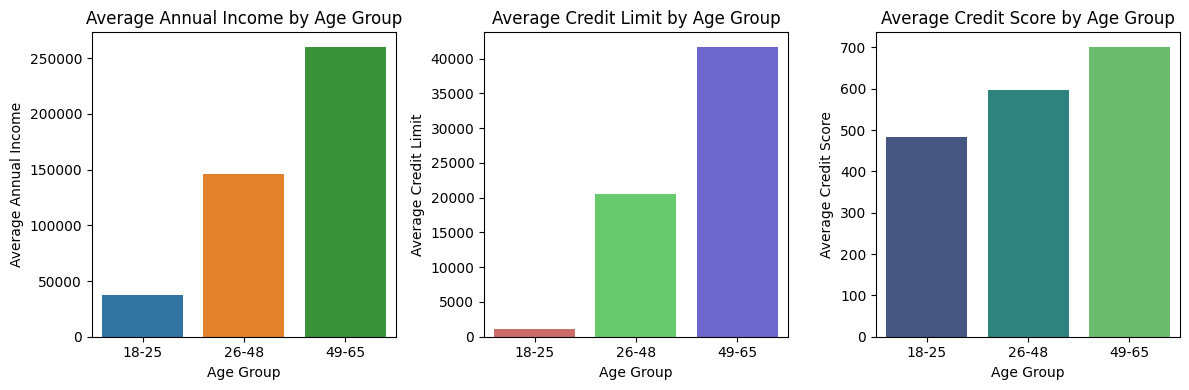

In [107]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Plot 1: Average annual income by age group
sns.barplot(x='age_Group', y='annual_income', data=age_group_metrics, palette='tab10', ax=ax1)
ax1.set_title('Average Annual Income by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average Annual Income')
ax1.tick_params(axis='x', rotation=0)

# Plot 2: Average Max Credit Limit by Age Group
sns.barplot(x='age_Group', y='credit_limit', data=age_group_metrics, palette='hls', ax=ax2)
ax2.set_title('Average Credit Limit by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Average Credit Limit')
ax2.tick_params(axis='x', rotation=0)

# Plot 3: Average Credit Score by Age Group
sns.barplot(x='age_Group', y='credit_score', data=age_group_metrics, palette='viridis', ax=ax3)
ax3.set_title('Average Credit Score by Age Group')
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Average Credit Score')
ax3.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

## Finalize Target Market For a Trial Credit Card Launch

1. People with age group of 18 -25 accounts to ~26% of customer base in the data
2. Avg annual income of this group is less than 50k
3. They don't have much credit history which is getting reflected in their credit score and credit limit 
4. Usage of credit cards as payment type is relatively low compared to other groups
5. Top 3 most shopping products categories : Electronics, Fashion & Apparel, Beauty & Personal care